# Linear Regression: sklearn - many (numeric) variables

Contents
 - load data
 - data manipulation
   - variables to use
 - multiple regression (with sklearn)
   - fit model
   - predictions
   - performance
   - coefficients

Sources:
http://ww2.amstat.org/publications/jse/v19n3/decock.pdf

Copyright (C) 2018 Alan Chalk  
Please do not distribute or publish without permission.

## Start_.

**Packages needed**

In [1]:
import os
import numpy as np
import pandas as pd
import pickle

from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline

**Functions**

In [2]:
def fn_MAE(actuals, predictions):
    return np.round(np.mean(np.abs(predictions - actuals)))

**Settings**

In [3]:
font = {'size'   : 22}
plt.rc('font', **font)

**Directories and paths**

In [4]:
# Set directories
print(os.getcwd())
dirRawData = "../input/"
dirPData   = "../PData/"

/home/jovyan/Projects/AmesHousing/PCode


**Load data**

In [5]:
#store = pd.HDFStore(dirPData + '02_df_all.h5')
#df_all = pd.read_hdf(store, 'df_all')
#store.close()
f_name = dirPData + '02_df.pickle'

with (open(f_name, "rb")) as f:
    dict_ = pickle.load(f)

df_all = dict_['df_all']

del f_name, dict_

In [6]:
# load the variables information
f_name = dirPData + '02_vars.pickle'
with open(f_name, "rb") as f:
    dict_ = pickle.load(f)
    
var_dep = dict_['var_dep']
vars_ind_numeric = dict_['vars_ind_numeric']

del f_name, dict_

**Take a small subset of variables for the linear model**

In [32]:
vars_toUse = vars_ind_numeric

In [33]:
X = df_all[vars_toUse].values
y = df_all[var_dep].values

## Multiple linear regression with sklearn

TODO

 - import LinearRegression from sklearn.linear_model
 - create an instance called lm_
 - fit the model to X and y

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm_ = LinearRegression()

In [36]:
lm_.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Coefficients**

In [37]:
coef_skl_intercept = list(lm_.intercept_)
coef_skl_other = list(lm_.coef_.flatten())
coef_skl = coef_skl_intercept + coef_skl_other

In [38]:
df_lm_results = pd.DataFrame({'features': ['intercept'] + vars_toUse,
                              'estimateCoefficients': np.round(coef_skl, 0)})
df_lm_results

,features,estimateCoefficients
0,intercept,384639.0
1,lot_area,1.0
2,overall_qual,15491.0
3,overall_cond,4304.0
4,year_built,359.0
5,year_remod_add,204.0
6,bsmtfin_sf_1,22.0
7,bsmtfin_sf_2,2.0
8,bsmt_unf_sf,-1.0
9,total_bsmt_sf,23.0


TODO 

- Why do we have some massive coefficients? (Actually they are not too bad - but in some early runs we had coefficients like 5e16 and -5e16)
- What can we do about this?

TODO

 - Rerun the above model with the smaller subset of variables in the cell below

In [29]:
vars_toUse = [var for var in vars_toUse if var not in ['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf',
                                                       'bsmt_full_bath', 'bsmt_half_bath',
                                                       'garage_cars',
                                                       'bedroom_abvgr', 'kitchen_abvgr',
                                                       'full_bath', 'half_bath',
                                                       'x1st_flr_sf', 'x2nd_flr_sf', 'low_qual_fin_sf',
                                                       'total_bsmt_sf',
                                                       'totrms_abvgrd', 'lot_area', 'overall_qual']]
X = df_all[vars_toUse].values
y = df_all[var_dep].values

TODO  
 - Based on the above coefficients, which feature is most important? (fireplaces?? - how many are there...)
 <b>ANS: The information is on a different scale!</b>
 - Now rerun the model after using the cell below to scale the features (gr_liv_area - what was the range of this 
 before scaling?)
 - What would you know say is the most important feature?  Does this make sense?
 ANS: After scaling, most significant feature is living area, followed by year built. Makes sense.

In [40]:
# df_all['fireplaces'].value_counts #number of fireplaces

In [191]:
###CHECKING RANGES, TO GET AN IDEA OF DIFFERENT SCALES
fp_max = df_all['fireplaces'].idxmax()
fp_min = df_all['fireplaces'].idxmin()
gr_liv_area_max = df_all['gr_liv_area'].idxmax()
gr_liv_area_min = df_all['gr_liv_area'].idxmin()
print('fp max: ',df_all['fireplaces'].iloc[fp_max])
print('fp min: ',df_all['fireplaces'].iloc[fp_min])


print('liv area max: ',df_all['gr_liv_area'].iloc[gr_liv_area_max])
print('liv area min: ',df_all['gr_liv_area'].iloc[gr_liv_area_min])

print('fp range: ',df_all['fireplaces'].iloc[fp_max]-df_all['fireplaces'].iloc[fp_min])
print('liv area range: ',df_all['gr_liv_area'].iloc[gr_liv_area_max]-df_all['gr_liv_area'].iloc[gr_liv_area_min])
# print('fireplaces: ',df_all['fireplaces'].idxmax() - df_all['fireplaces'].idxmin()) #range of fireplaces before scaling
# print('gr_liv_area: ', df_all['gr_liv_area'].idxmax() - df_all['gr_liv_area'].idxmin()) #range of gr_liv_area before scaling

fp max:  4.0
fp min:  0.0
liv area max:  3672.0
liv area min:  334.0
fp range:  4.0
liv area range:  3338.0


In [25]:
from sklearn.preprocessing import StandardScaler

standardScaler_ = StandardScaler()
standardScaler_.fit(X)
X = standardScaler_.transform(X)

In [196]:
###STANDARD SCALER ADJUSTS EVERY VARIABLE SO THAT THEIR MEAN IS 0 AND STANDARD DEV IS 1 (I.E. STANDARDISES THEM)
# scaled features: means 
print("scaled features: means: ", np.round(X.mean(axis=0),5) )

# scaled features: variance
print("scaled features: standard deviation: ", np.round(X.std(axis=0),5) )

scaled features: means:  [ 0. -0.  0.  0. -0. -0. -0.  0.  0. -0.  0.  0.  0. -0. -0.]
scaled features: standard deviation:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**Graph of average sale price by living area quantile**

In [197]:
df_all['gr_liv_area_q'] = pd.qcut(df_all['gr_liv_area'], 20, labels=False) #note equal no. of bins in each quantile
gb_temp = df_all.groupby('gr_liv_area_q').agg({'saleprice': lambda x: np.round(np.mean(x))}).reset_index()
gb_temp.head()

,gr_liv_area_q,saleprice
0,0,98141.0
1,1,117268.0
2,2,120502.0
3,3,130202.0
4,4,128688.0


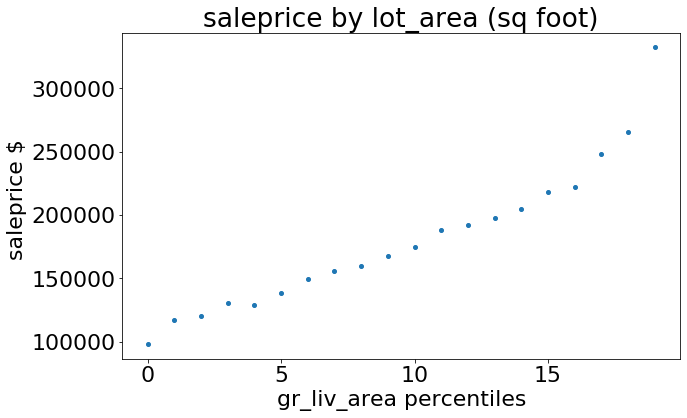

In [48]:
# create a new figure
fig = plt.figure(figsize = (10,6))

# add a subplot
ax1 = fig.add_subplot(1, 1, 1)

_ = ax1.scatter(gb_temp['gr_liv_area_q'],  gb_temp['saleprice'], s = 16)
ax1.set_xlabel('gr_liv_area percentiles')
ax1.set_ylabel('saleprice $ ')
_ = plt.title('saleprice by lot_area (sq foot)')

## Predictions 

**TODO**

- Use the predict method of your lm_ object to predict the linear model for each row of X
- Find the mean prediction and compare it to the mean of the target variable.  Is it the same?  Is this surprising?

<b>Ans: Not surprising as model has an intercept which captures average error</b>

In [54]:
?LinearRegression.predict()

In [198]:
# prediction 
lm__pred = lm_.predict(X)

In [200]:
mean_predicted = np.mean(lm__pred)
# mean_actual = np.mean(df_all['saleprice']) 
mean_actual = np.mean(y) 
print('mean predicted sale price: ${:,.0f}'.format(mean_predicted))
print('mean actual sale price: ${:,.0f}'.format(mean_actual))

mean predicted sale price: $180,421
mean actual sale price: $180,421


**Replicate one prediction**

The prediction for the first example is given below

In [201]:
# What is the prediction on the first example:
print('prediction on first example', np.round(lm__pred[0], 0), '\n')
print('actual sale price on first example', df_all[var_dep[0]].iloc[0])


prediction on first example [197352.] 

actual sale price on first example 215000.0


In [202]:
# What is the intercept and what are the other coefficients
print('intercept', lm_.intercept_, '\n')
print('coefficients', lm_.coef_, '\n')

intercept [180420.68685832] 

coefficients [[ 6632.12872603 23144.71258818  8496.07537173 34099.67335803
  10285.13439506 16719.954712    4586.49886457  3025.28130609
   2567.18846942   958.18770425  4432.03659486 -1646.13700319
   -368.45242442  -553.56153625 -1433.00401289]] 



**TODO** 
- Calculate the prediction for the first example:
 $$ \text{intercept} + \text{dot product of other coefficients and X[0]}$$
- Compare your result to the prediction above (197,352)

In [203]:
###DEBUGGING, checking data dealing with
# X.shape
# temp = X[0][np.newaxis]
# temp.shape
# lm_.intercept_.shape
# lm_.coef_.shape

In [205]:
manual_prediction = lm_.intercept_ + lm_.coef_.dot(X[0])
# manual_prediction = lm_.intercept_ + X[0][np.newaxis].dot(lm_.coef_.T) #Alternative to above, need to make X[0] into a 2D mat to transpose (1D transposed is still 1D)
#See: https://stackoverflow.com/questions/5954603/transposing-a-numpy-array
print('manual prediction', manual_prediction)

manual prediction [197352.3232503]


**Performance**

**TODO**

 - Calculate the mean absolute error of your predictions
 - Is this a good indication of performance of this model on future data that it has not yet seen?  (Actually probably yes because it is unlikely to be overfitted)

In [207]:
# mean absolute error in predictions
# on train data
# df_all[var_dep].values
# lm__pred
# train_error = fn_MAE(df_all[var_dep].values, lm__pred)
train_error = fn_MAE(y, lm__pred)


print('train error', train_error) 

train error 27020.0


In [147]:
# del train_error